In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import numpy as np
from sklearn.feature_selection import mutual_info_classif,f_classif,SelectFromModel
from sklearn.feature_selection import SelectKBest,SelectPercentile,SequentialFeatureSelector as SFS,RFE
from scipy.stats import chi2_contingency
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,)
from keras import models
from keras import layers
import keras
from keras import regularizers
from keras.callbacks import EarlyStopping,ModelCheckpoint
import math

In [2]:
data=pd.read_csv('Airline Passenger/train.csv')
test=pd.read_csv('Airline Passenger/test.csv')

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
data.shape

(103904, 25)

In [6]:
test.shape

(25976, 25)

In [7]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [9]:
data['Arrival Delay in Minutes'].head()

0    18.0
1     6.0
2     0.0
3     9.0
4     0.0
Name: Arrival Delay in Minutes, dtype: float64

In [10]:
data['Arrival Delay in Minutes'].min(),data['Arrival Delay in Minutes'].max(),data['Arrival Delay in Minutes'].mean()

(0.0, 1584.0, 15.178678301832152)

#### Random Sample Imputation

In [11]:
random_sample_train=(data['Arrival Delay in Minutes'].dropna().sample(data['Arrival Delay in Minutes'].isnull().sum(),random_state=0))
random_sample_test=(data['Arrival Delay in Minutes'].dropna().sample(test['Arrival Delay in Minutes'].isnull().sum(),random_state=0))
random_sample_train.index=data[data['Arrival Delay in Minutes'].isnull()].index
random_sample_test.index=test[test['Arrival Delay in Minutes'].isnull()].index
data.loc[data['Arrival Delay in Minutes'].isnull(),'Arrival Delay in Minutes']=random_sample_train
test.loc[test['Arrival Delay in Minutes'].isnull(),'Arrival Delay in Minutes']=random_sample_test

In [12]:
data['Arrival Delay in Minutes'].isnull().sum()

0

In [13]:
test['Arrival Delay in Minutes'].isnull().sum()

0

In [14]:
for var in data.columns:
    if data[var].dtype=='O':
        print(var)
        print(data[var].value_counts())
        print('####################')

Gender
Gender
Female    52727
Male      51177
Name: count, dtype: int64
####################
Customer Type
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
####################
Type of Travel
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
####################
Class
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
####################
satisfaction
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64
####################


In [15]:
categorical_var=['Gender','Customer Type','Type of Travel']
target_var=['satisfaction']

In [16]:
for var in data.columns:
    if data[var].dtypes=='O':
        print(var)
        print(data[var].unique())

Gender
['Male' 'Female']
Customer Type
['Loyal Customer' 'disloyal Customer']
Type of Travel
['Personal Travel' 'Business travel']
Class
['Eco Plus' 'Business' 'Eco']
satisfaction
['neutral or dissatisfied' 'satisfied']


In [17]:
for var in data.columns:
    if data[var].dtype!='O':
        print(var)
        print(data[var].unique())
        print('------------')

Unnamed: 0
[     0      1      2 ... 103901 103902 103903]
------------
id
[ 70172   5047 110028 ...  68825  54173  62567]
------------
Age
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
------------
Flight Distance
[ 460  235 1142 ...  974 1479  400]
------------
Inflight wifi service
[3 2 4 1 5 0]
------------
Departure/Arrival time convenient
[4 2 5 3 1 0]
------------
Ease of Online booking
[3 2 5 4 1 0]
------------
Gate location
[1 3 2 5 4 0]
------------
Food and drink
[5 1 2 4 3 0]
------------
Online boarding
[3 5 2 1 4 0]
------------
Seat comfort
[5 1 2 3 4 0]
------------
Inflight entertainment
[5 1 2 3 4 0]
------------
On-board service
[4 1 2 3 5 0]
------------
Leg room service
[3 5 4 2 1 0]
------------
Baggage handling
[4 3 5 1 2]
------------
Checkin service
[4 1 3 5 2 0]
------------
Inf

In [18]:
ordinal_var=['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']

In [19]:
numrical_var=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

In [20]:
print('Categorical Variable :',categorical_var)
print('######################################## \n')
print('Ordinal Variable :',ordinal_var)
print('######################################## \n')
print('Target Variable :',target_var)
print('######################################## \n')
print('Numerical Variable :',numrical_var)
print('######################################## \n')

Categorical Variable : ['Gender', 'Customer Type', 'Type of Travel']
######################################## 

Ordinal Variable : ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
######################################## 

Target Variable : ['satisfaction']
######################################## 

Numerical Variable : ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
######################################## 



#### <center> Exploratory data analysis (EDA)  </canter>

In [21]:
eda=pd.concat([data,test])
eda=eda.drop(['Unnamed: 0','id'],axis=1)
eda.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [22]:
df=eda['satisfaction'].value_counts().to_frame().reset_index()
df.set_index('satisfaction')

,count
satisfaction,
neutral or dissatisfied,73452
satisfied,56428


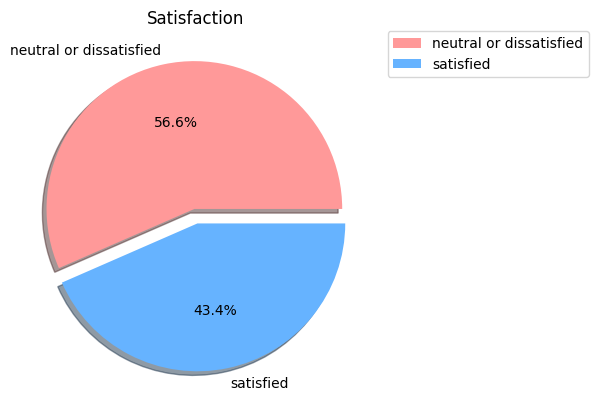

In [23]:
satisfaction=eda['satisfaction'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax=satisfaction.plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.05,0.05],colors=colors,legend=True,title='Satisfaction',ylabel='')
ax.legend(bbox_to_anchor=(1,1.02),loc='upper left')

In [24]:
eda.groupby(['Type of Travel','satisfaction'])['satisfaction'].agg(['count'])

count
Type of Travel  satisfaction                  
Business travel neutral or dissatisfied  37337
                satisfied                52356
Personal Travel neutral or dissatisfied  36115
                satisfied                 4072

In [25]:
eda.groupby(['Class','satisfaction'])['satisfaction'].agg(['count'])

count
Class    satisfaction                  
Business neutral or dissatisfied  18994
         satisfied                43166
Eco      neutral or dissatisfied  47366
         satisfied                10943
Eco Plus neutral or dissatisfied   7092
         satisfied                 2319

<Axes: xlabel='Ease of Online booking', ylabel='Count'>

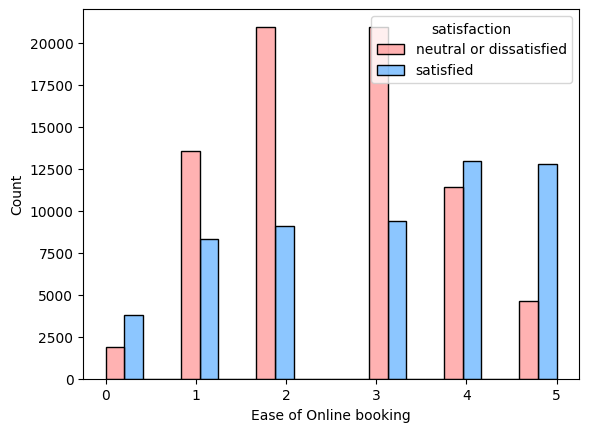

In [26]:
sns.histplot(data=eda,x='Ease of Online booking',hue='satisfaction',multiple="dodge",binwidth=0.4,  
             palette={'neutral or dissatisfied': '#ff9999', 'satisfied': '#66b3ff'})

In [27]:
mask=(eda['Ease of Online booking']>=4)
ease_of_online_booking_gt_4=eda[mask]
ease_of_online_booking_gt_4.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
10,Female,disloyal Customer,24,Business travel,Eco,1182,4,5,5,4,...,2,3,3,5,3,5,2,0,0.0,neutral or dissatisfied
12,Male,Loyal Customer,53,Business travel,Eco,834,1,4,4,4,...,1,1,1,3,4,4,1,28,8.0,neutral or dissatisfied
13,Male,Loyal Customer,33,Personal Travel,Eco,946,4,2,4,3,...,4,4,5,2,2,2,4,0,0.0,satisfied


In [28]:
ease_of_online_booking_gt_4.groupby(['Type of Travel','satisfaction'])['satisfaction'].count()

Type of Travel   satisfaction           
Business travel  neutral or dissatisfied    10619
                 satisfied                  22803
Personal Travel  neutral or dissatisfied     5453
                 satisfied                   2993
Name: satisfaction, dtype: int64

In [29]:
ease_of_online_booking_gt_4.groupby(['Gender','satisfaction'])['satisfaction'].count()

Gender  satisfaction           
Female  neutral or dissatisfied     8131
        satisfied                  12912
Male    neutral or dissatisfied     7941
        satisfied                  12884
Name: satisfaction, dtype: int64

In [30]:
ease_of_online_booking_gt_4.groupby(['Customer Type','satisfaction'])['satisfaction'].count()

Customer Type      satisfaction           
Loyal Customer     neutral or dissatisfied    13418
                   satisfied                  21375
disloyal Customer  neutral or dissatisfied     2654
                   satisfied                   4421
Name: satisfaction, dtype: int64

In [31]:
ease_of_online_booking_gt_4.groupby(['Class','satisfaction'])['satisfaction'].count()

Class     satisfaction           
Business  neutral or dissatisfied     5721
          satisfied                  18476
Eco       neutral or dissatisfied     8739
          satisfied                   6237
Eco Plus  neutral or dissatisfied     1612
          satisfied                   1083
Name: satisfaction, dtype: int64

<Axes: xlabel='Departure/Arrival time convenient', ylabel='Count'>

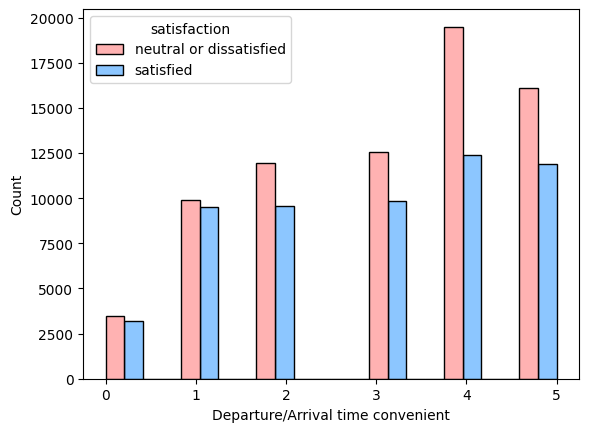

In [32]:
sns.histplot(data=eda,x='Departure/Arrival time convenient',hue='satisfaction',multiple="dodge",binwidth=0.4,
             palette={'neutral or dissatisfied': '#ff9999', 'satisfied': '#66b3ff'})

<Axes: xlabel='Inflight service', ylabel='Count'>

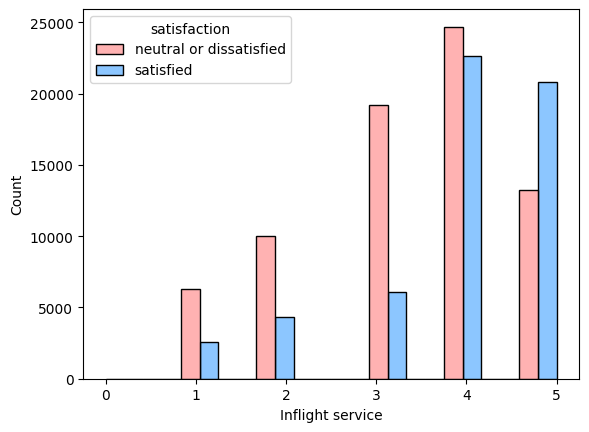

In [33]:
sns.histplot(data=eda,x='Inflight service',hue='satisfaction',multiple="dodge",binwidth=0.4,
             palette={'neutral or dissatisfied': '#ff9999', 'satisfied': '#66b3ff'})

<Axes: xlabel='Baggage handling', ylabel='Count'>

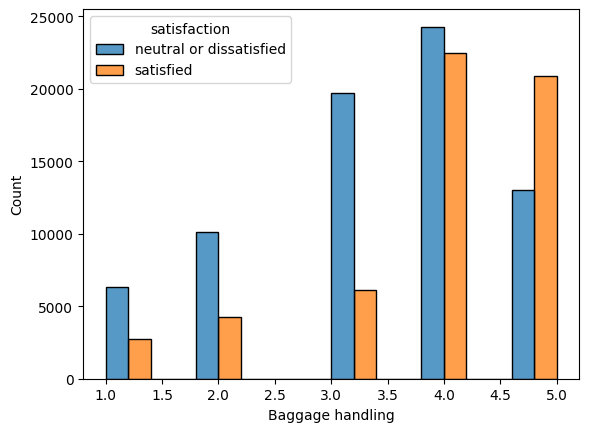

In [34]:
sns.histplot(data=eda,x='Baggage handling',hue='satisfaction',multiple="dodge",binwidth=0.4)

In [35]:
mask=(eda['Baggage handling']>=4)
baggage_handling_gt_4=eda[mask]
baggage_handling_gt_4.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied


In [36]:
baggage_handling_gt_4.groupby(['Customer Type','satisfaction'])['satisfaction'].count()

Customer Type      satisfaction           
Loyal Customer     neutral or dissatisfied    26927
                   satisfied                  38595
disloyal Customer  neutral or dissatisfied    10371
                   satisfied                   4746
Name: satisfaction, dtype: int64

#### Most airlines do handle the baggage of business class customers separately from economy class passengers, meaning their luggage is typically prioritized for check-in, loading, and unloading, often receiving faster processing and priority treatment due to their higher fare class; this usually includes dedicated baggage belts at arrival as well. 

In [37]:
baggage_handling_gt_4.groupby(['Class','satisfaction'])['satisfaction'].count()

Class     satisfaction           
Business  neutral or dissatisfied     8456
          satisfied                  35811
Eco       neutral or dissatisfied    25295
          satisfied                   6351
Eco Plus  neutral or dissatisfied     3547
          satisfied                   1179
Name: satisfaction, dtype: int64

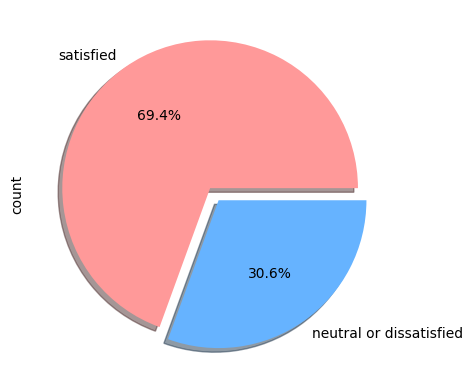

In [38]:
ax1=eda[eda['Class']=='Business']['satisfaction'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.05,0.05],
                                                                      colors=colors)

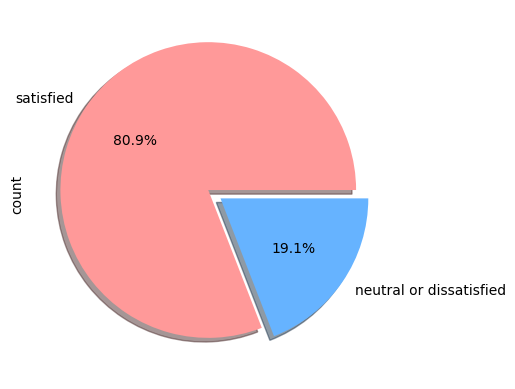

In [39]:
ax2=baggage_handling_gt_4[baggage_handling_gt_4['Class']=='Business']['satisfaction'].value_counts().plot(
                          kind='pie',shadow=True,explode=[0.05,0.05],autopct='%1.1f%%',colors=colors)

#### Loyal Customer are  neutral or dissatisfied (almost 37,000)  

In [40]:
baggage_handling_gt_4.groupby(['Customer Type','satisfaction'])['satisfaction'].count()

Customer Type      satisfaction           
Loyal Customer     neutral or dissatisfied    26927
                   satisfied                  38595
disloyal Customer  neutral or dissatisfied    10371
                   satisfied                   4746
Name: satisfaction, dtype: int64

<Axes: xlabel='Cleanliness', ylabel='Count'>

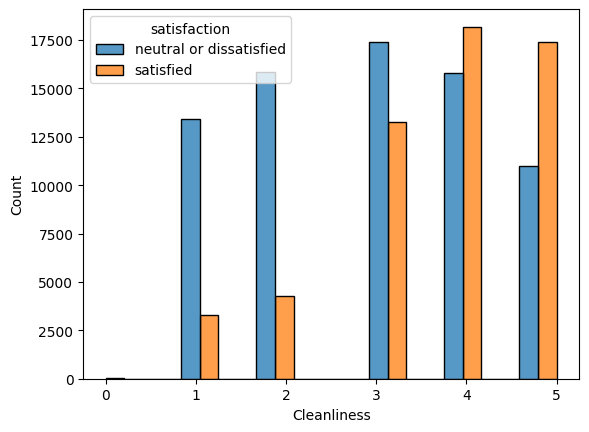

In [41]:
sns.histplot(data=eda,x='Cleanliness',hue='satisfaction',multiple="dodge",binwidth=0.4)

In [42]:
mask=(eda['Cleanliness']>=4)
cleanliness_gt_4=eda[mask]
cleanliness_gt_4.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
13,Male,Loyal Customer,33,Personal Travel,Eco,946,4,2,4,3,...,4,4,5,2,2,2,4,0,0.0,satisfied
15,Male,disloyal Customer,13,Business travel,Eco,486,2,1,2,3,...,4,2,1,4,1,3,4,1,0.0,neutral or dissatisfied


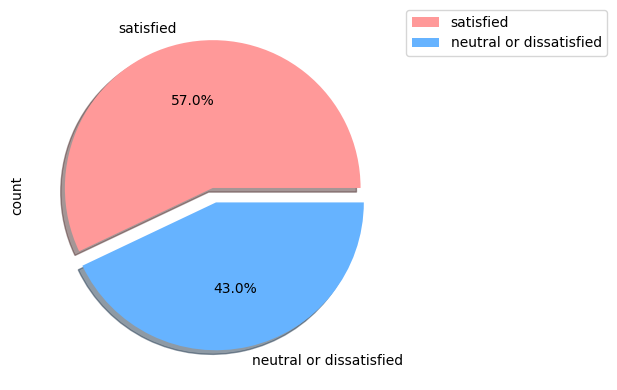

In [43]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax=cleanliness_gt_4['satisfaction'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.05,0.05],colors=colors,legend=True)
ax.legend(bbox_to_anchor=(1,1.02),loc='upper left')

In [44]:
eda.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [45]:
eda.groupby(['Class','Seat comfort','satisfaction'])['satisfaction'].count().unstack().sort_values(by='satisfied',ascending=False)

satisfaction           neutral or dissatisfied  satisfied
Class    Seat comfort                                    
Business 4                              4961.0    18171.0
         5                              1724.0    17793.0
Eco      4                             10908.0     3335.0
         5                              8718.0     3045.0
Business 3                              6280.0     2845.0
         2                              3665.0     2414.0
         1                              2363.0     1943.0
Eco      3                             10390.0     1790.0
         2                              9209.0     1537.0
         1                              8141.0     1236.0
Eco Plus 4                              1612.0      769.0
         5                              1119.0      759.0
         3                              1664.0      359.0
         2                              1467.0      237.0
         1                              1230.0      195.0
Business 0                                 1.0        NaN

In [46]:
eda.groupby(['Class','Food and drink','satisfaction'])['satisfaction'].count().unstack().sort_values(by='satisfied',ascending=False)

satisfaction             neutral or dissatisfied  satisfied
Class    Food and drink                                    
Business 4                                  3547      12038
         5                                  2991      11509
         3                                  4451       8992
         2                                  4465       8761
Eco      4                                  9593       3260
         5                                  8463       3099
Business 1                                  3527       1842
Eco      3                                 10612       1755
         2                                 10555       1642
         1                                  8091       1166
Eco Plus 5                                  1102        793
         4                                  1352        773
         3                                  1685        299
         2                                  1711        249
         1                                  1230        195
Business 0                                    13         24
Eco      0                                    52         21
Eco Plus 0                                    12         10

In [47]:
eda.groupby(['satisfaction'])['Arrival Delay in Minutes'].agg(['mean','max','min'])

,mean,max,min
satisfaction,,,
neutral or dissatisfied,17.053355,1584.0,0.0
satisfied,12.528567,1280.0,0.0


In [48]:
eda.groupby(['satisfaction'])['Departure Delay in Minutes'].agg(['mean','max','min'])

,mean,max,min
satisfaction,,,
neutral or dissatisfied,16.406837,1592,0
satisfied,12.509782,1305,0


In [49]:
eda['Flight Distance'].min(),eda['Flight Distance'].max()

(31, 4983)

In [50]:
longest_flights=eda[eda['Flight Distance']>=4000]
longest_flights.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
994,Female,Loyal Customer,26,Business travel,Business,4243,2,2,2,2,...,3,5,4,4,4,5,4,26,0.0,satisfied
2401,Female,Loyal Customer,25,Personal Travel,Eco,4963,2,5,2,4,...,5,3,4,4,2,3,2,0,0.0,neutral or dissatisfied
2847,Female,Loyal Customer,63,Personal Travel,Business,4983,0,5,0,2,...,3,2,4,3,1,5,1,3,0.0,satisfied
5903,Female,Loyal Customer,25,Business travel,Business,4243,4,5,3,5,...,3,2,3,4,4,4,4,4,0.0,neutral or dissatisfied
6967,Female,Loyal Customer,39,Business travel,Business,4000,3,3,3,3,...,5,5,5,5,3,5,3,0,0.0,satisfied


In [51]:
mask=(eda['Flight Distance']>=1600) & (eda['Flight Distance']<=4000)
medium_haul_flights=eda[mask]
medium_haul_flights.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
16,Female,Loyal Customer,26,Business travel,Business,2123,3,3,3,3,...,4,5,3,4,5,4,4,49,51.0,satisfied
17,Male,Loyal Customer,41,Business travel,Business,2075,4,4,2,4,...,5,5,5,5,3,5,5,0,10.0,satisfied
18,Female,Loyal Customer,45,Business travel,Business,2486,4,4,4,4,...,5,5,5,5,3,5,4,7,5.0,satisfied
23,Female,Loyal Customer,58,Personal Travel,Eco,2139,4,5,4,5,...,4,4,4,4,2,4,2,0,0.0,neutral or dissatisfied


In [52]:
mask=(eda['Flight Distance']>31) & (eda['Flight Distance']<500)
shortest_flights=eda[mask]
shortest_flights.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
11,Female,Loyal Customer,12,Personal Travel,Eco Plus,308,2,4,2,2,...,1,1,2,5,5,5,1,0,0.0,neutral or dissatisfied
14,Female,Loyal Customer,26,Personal Travel,Eco,453,3,2,3,2,...,2,4,3,2,2,1,2,43,35.0,neutral or dissatisfied


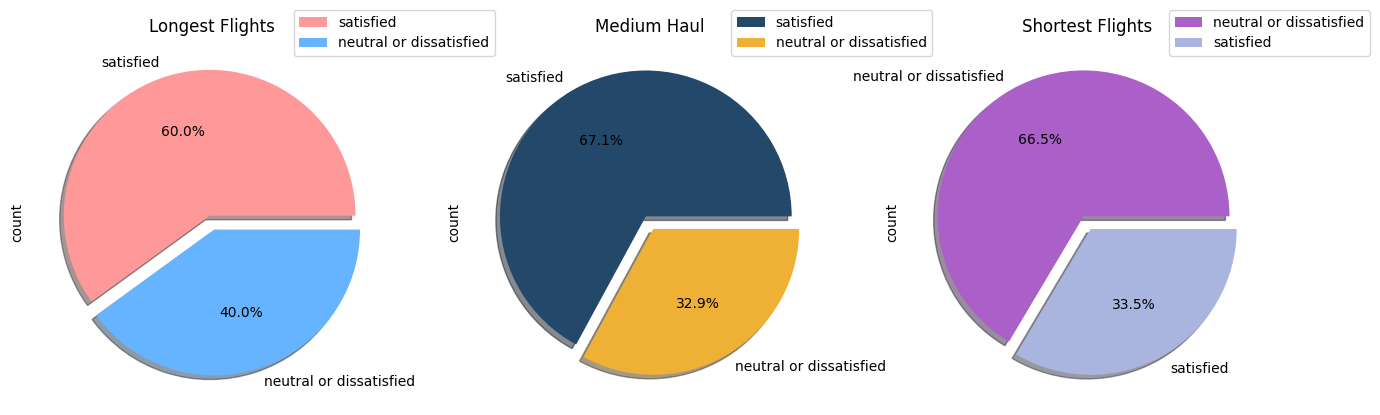

In [53]:
fig=plt.figure(figsize=(16,7))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
longest_flights['satisfaction'].value_counts().plot(kind='pie',ax=ax1,
                                                    autopct='%1.1f%%',
                                                   shadow=True,
                                                   explode=[0.05,0.05],
                                                   colors=colors,
                                                   legend=True)
ax1.legend(bbox_to_anchor=(1,1.02),loc='center')
ax1.set_title('Longest Flights')

medium_haul_flights['satisfaction'].value_counts().plot(kind='pie',
                                                       autopct='%1.1f%%',
                                                        ax=ax2,
                                                        shadow=True,
                                                        explode=[0.05,0.05],
                                                        colors=['#23486A','#EFB036'])
ax2.legend(bbox_to_anchor=(1,1.02),loc='center')
ax2.set_title('Medium Haul')

shortest_flights['satisfaction'].value_counts().plot(kind='pie',
                                                     ax=ax3,
                                                     autopct='%1.1f%%',
                                                     shadow=True,
                                                     explode=[0.05,0.05],
                                                     colors=['#AA60C8','#A9B5DF'],
                                                     legend=True,)
ax3.legend(bbox_to_anchor=(1,1.02),loc='center')
ax3.set_title('Shortest Flights')




plt.subplots_adjust(hspace=40)

In [54]:
longest_flights.groupby(['Customer Type','satisfaction'])['satisfaction'].agg(['count'])

count
Customer Type     satisfaction                  
Loyal Customer    neutral or dissatisfied     30
                  satisfied                   52
disloyal Customer neutral or dissatisfied      6
                  satisfied                    2

In [55]:
shortest_flights.groupby(['Customer Type','satisfaction'])['satisfaction'].agg(['count'])

count
Customer Type     satisfaction                  
Loyal Customer    neutral or dissatisfied  19028
                  satisfied                11262
disloyal Customer neutral or dissatisfied   7594
                  satisfied                 2177

In [56]:
medium_haul_flights.groupby(['Customer Type','satisfaction'])['satisfaction'].agg(['count'])

count
Customer Type     satisfaction                  
Loyal Customer    neutral or dissatisfied  10858
                  satisfied                23955
disloyal Customer neutral or dissatisfied    998
                  satisfied                  199

In [57]:
longest_flights.groupby(['Class','satisfaction'])['satisfaction'].agg(['count'])

count
Class    satisfaction                  
Business neutral or dissatisfied     12
         satisfied                   46
Eco      neutral or dissatisfied     20
         satisfied                    5
Eco Plus neutral or dissatisfied      4
         satisfied                    3

In [58]:
shortest_flights.groupby(['Class','satisfaction'])['satisfaction'].agg(['count'])

count
Class    satisfaction                  
Business neutral or dissatisfied   5141
         satisfied                 7457
Eco      neutral or dissatisfied  18610
         satisfied                 4914
Eco Plus neutral or dissatisfied   2871
         satisfied                 1068

In [59]:
medium_haul_flights.groupby(['Class','satisfaction'])['satisfaction'].agg(['count'])

count
Class    satisfaction                  
Business neutral or dissatisfied   7302
         satisfied                23349
Eco      neutral or dissatisfied   3874
         satisfied                  661
Eco Plus neutral or dissatisfied    680
         satisfied                  144

<Axes: xlabel='Cleanliness', ylabel='Count'>

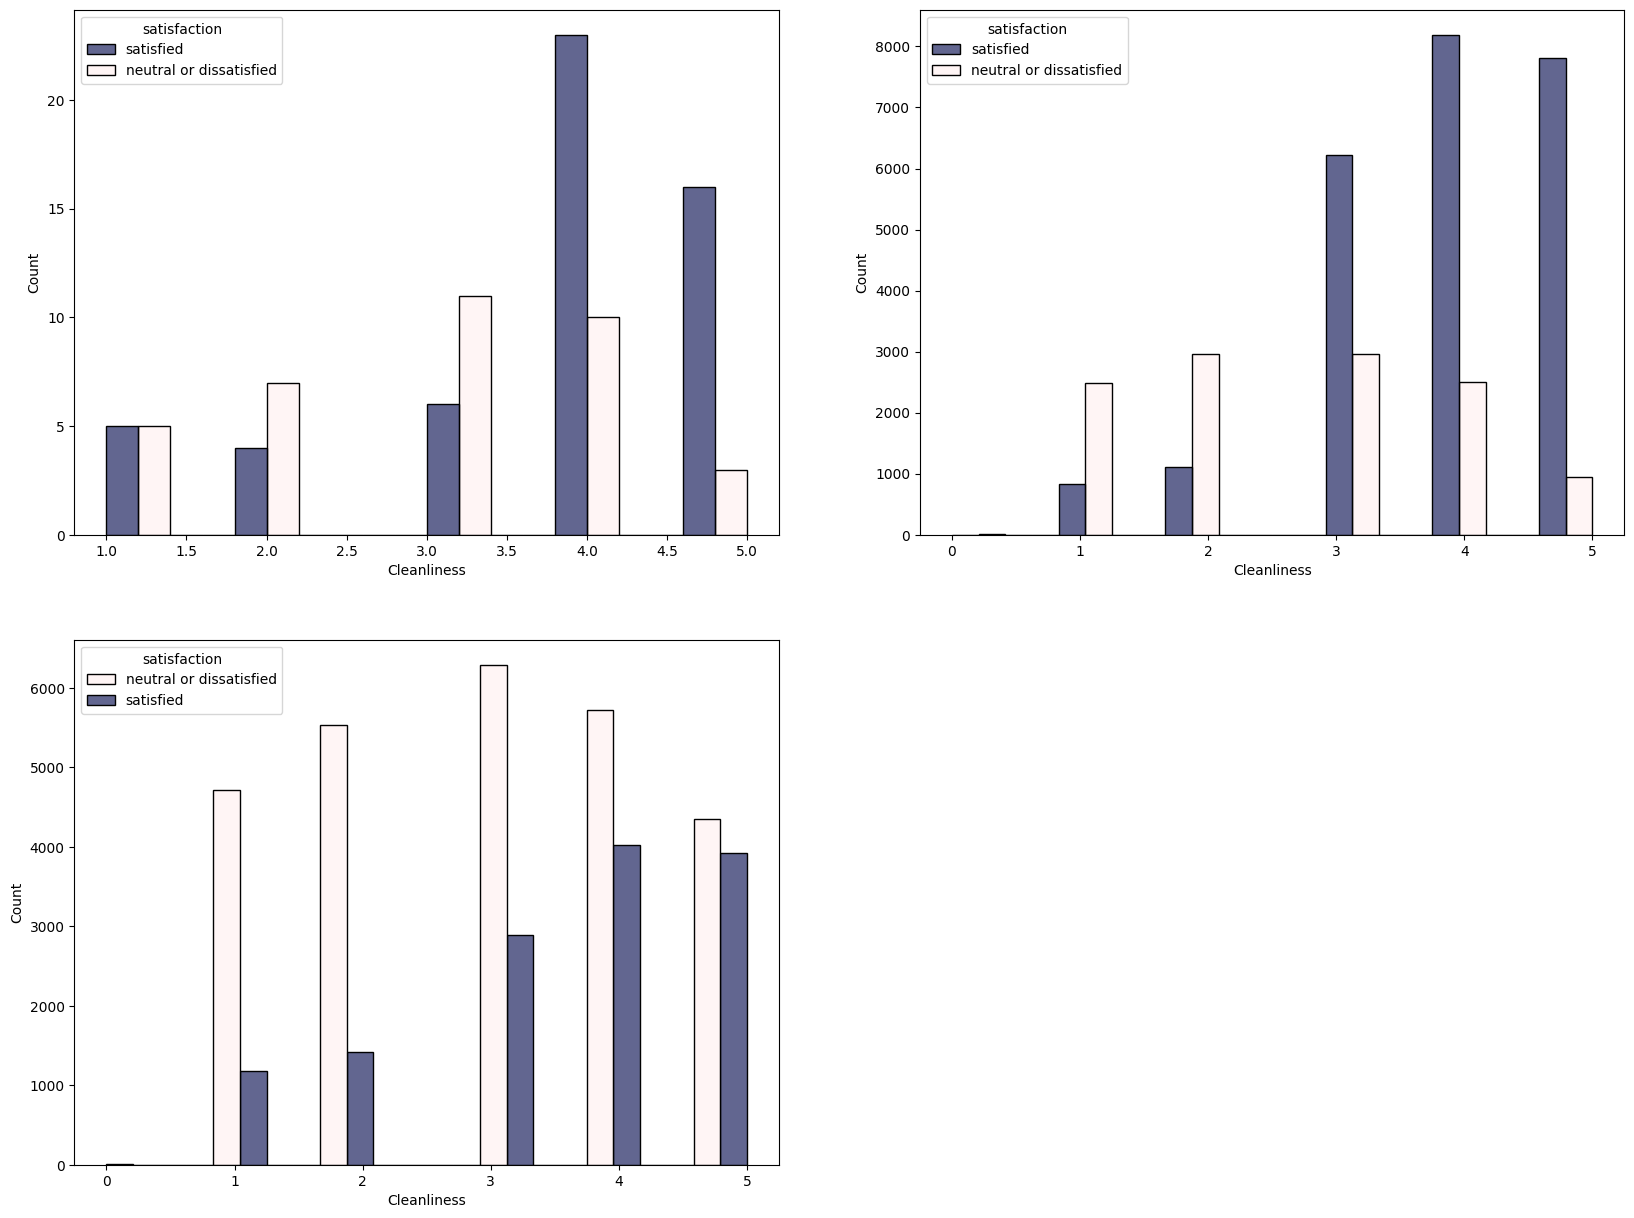

In [60]:
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
sns.histplot(data=longest_flights,x='Cleanliness',hue='satisfaction',multiple="dodge",ax=ax1,binwidth=0.4,
            palette={'satisfied':'#2D336B','neutral or dissatisfied':'#FFF2F2'})
sns.histplot(data=medium_haul_flights,x='Cleanliness',hue='satisfaction',multiple='dodge',ax=ax2,binwidth=0.4,
             palette={'satisfied':'#2D336B','neutral or dissatisfied':'#FFF2F2'})
sns.histplot(data=shortest_flights,x='Cleanliness',hue='satisfaction',multiple='dodge',ax=ax3,binwidth=0.4,
             palette={'satisfied':'#2D336B','neutral or dissatisfied':'#FFF2F2'})

In [61]:
longest_flights.groupby(['Cleanliness','satisfaction'])['satisfaction'].agg(['count'])

count
Cleanliness satisfaction                  
1           neutral or dissatisfied      5
            satisfied                    5
2           neutral or dissatisfied      7
            satisfied                    4
3           neutral or dissatisfied     11
            satisfied                    6
4           neutral or dissatisfied     10
            satisfied                   23
5           neutral or dissatisfied      3
            satisfied                   16

In [62]:
medium_haul_flights.groupby(['Cleanliness','satisfaction'])['satisfaction'].agg(['count'])

count
Cleanliness satisfaction                  
0           neutral or dissatisfied      4
1           neutral or dissatisfied   2486
            satisfied                  824
2           neutral or dissatisfied   2964
            satisfied                 1106
3           neutral or dissatisfied   2962
            satisfied                 6217
4           neutral or dissatisfied   2495
            satisfied                 8192
5           neutral or dissatisfied    945
            satisfied                 7815

In [63]:
shortest_flights.groupby(['Cleanliness','satisfaction'])['satisfaction'].agg(['count'])

count
Cleanliness satisfaction                  
0           neutral or dissatisfied      4
1           neutral or dissatisfied   4717
            satisfied                 1184
2           neutral or dissatisfied   5535
            satisfied                 1414
3           neutral or dissatisfied   6291
            satisfied                 2885
4           neutral or dissatisfied   5721
            satisfied                 4028
5           neutral or dissatisfied   4354
            satisfied                 3928

<Axes: xlabel='Baggage handling', ylabel='Count'>

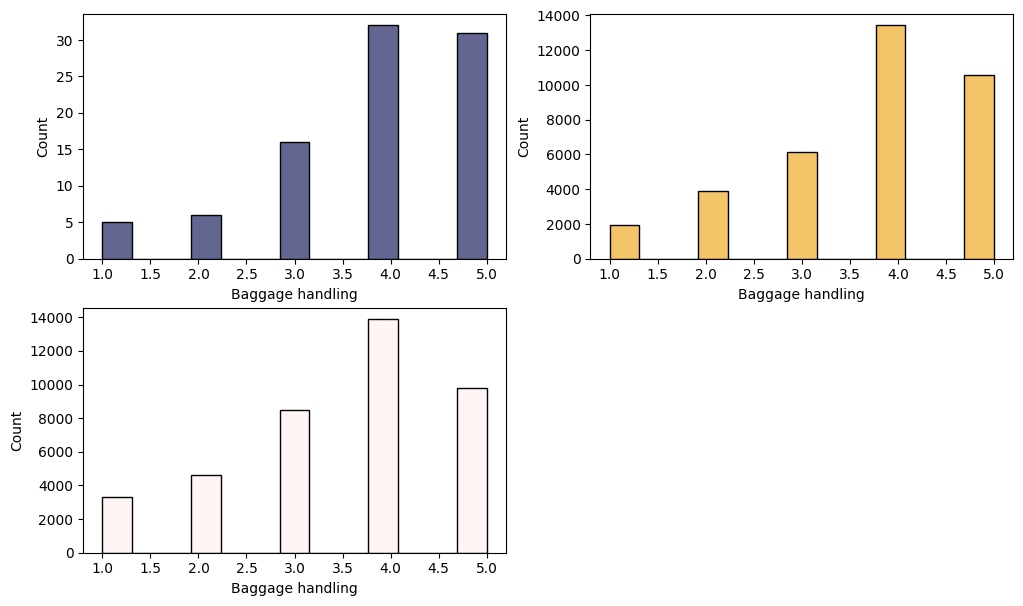

In [64]:
fig=plt.figure(figsize=(12,7))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
sns.histplot(data=longest_flights,x='Baggage handling',binwidth=0.3,color='#2D336B',ax=ax1)
sns.histplot(data=medium_haul_flights,x='Baggage handling',binwidth=0.3,color='#EFB036',ax=ax2)
sns.histplot(data=shortest_flights,x='Baggage handling',binwidth=0.3,color='#FFF2F2',ax=ax3)

In [65]:
longest_flights.groupby(['Type of Travel','satisfaction'])['satisfaction'].agg(['count'])

count
Type of Travel  satisfaction                  
Business travel neutral or dissatisfied     18
                satisfied                   48
Personal Travel neutral or dissatisfied     18
                satisfied                    6

In [66]:
medium_haul_flights.groupby(['Type of Travel','satisfaction'])['satisfaction'].agg(['count'])

count
Type of Travel  satisfaction                  
Business travel neutral or dissatisfied   8173
                satisfied                23721
Personal Travel neutral or dissatisfied   3683
                satisfied                  433

In [67]:
shortest_flights.groupby(['Type of Travel','satisfaction'])['satisfaction'].agg(['count'])

count
Type of Travel  satisfaction                  
Business travel neutral or dissatisfied  12808
                satisfied                11850
Personal Travel neutral or dissatisfied  13814
                satisfied                 1589

Text(0.5, 1.0, 'Shortest Flights')

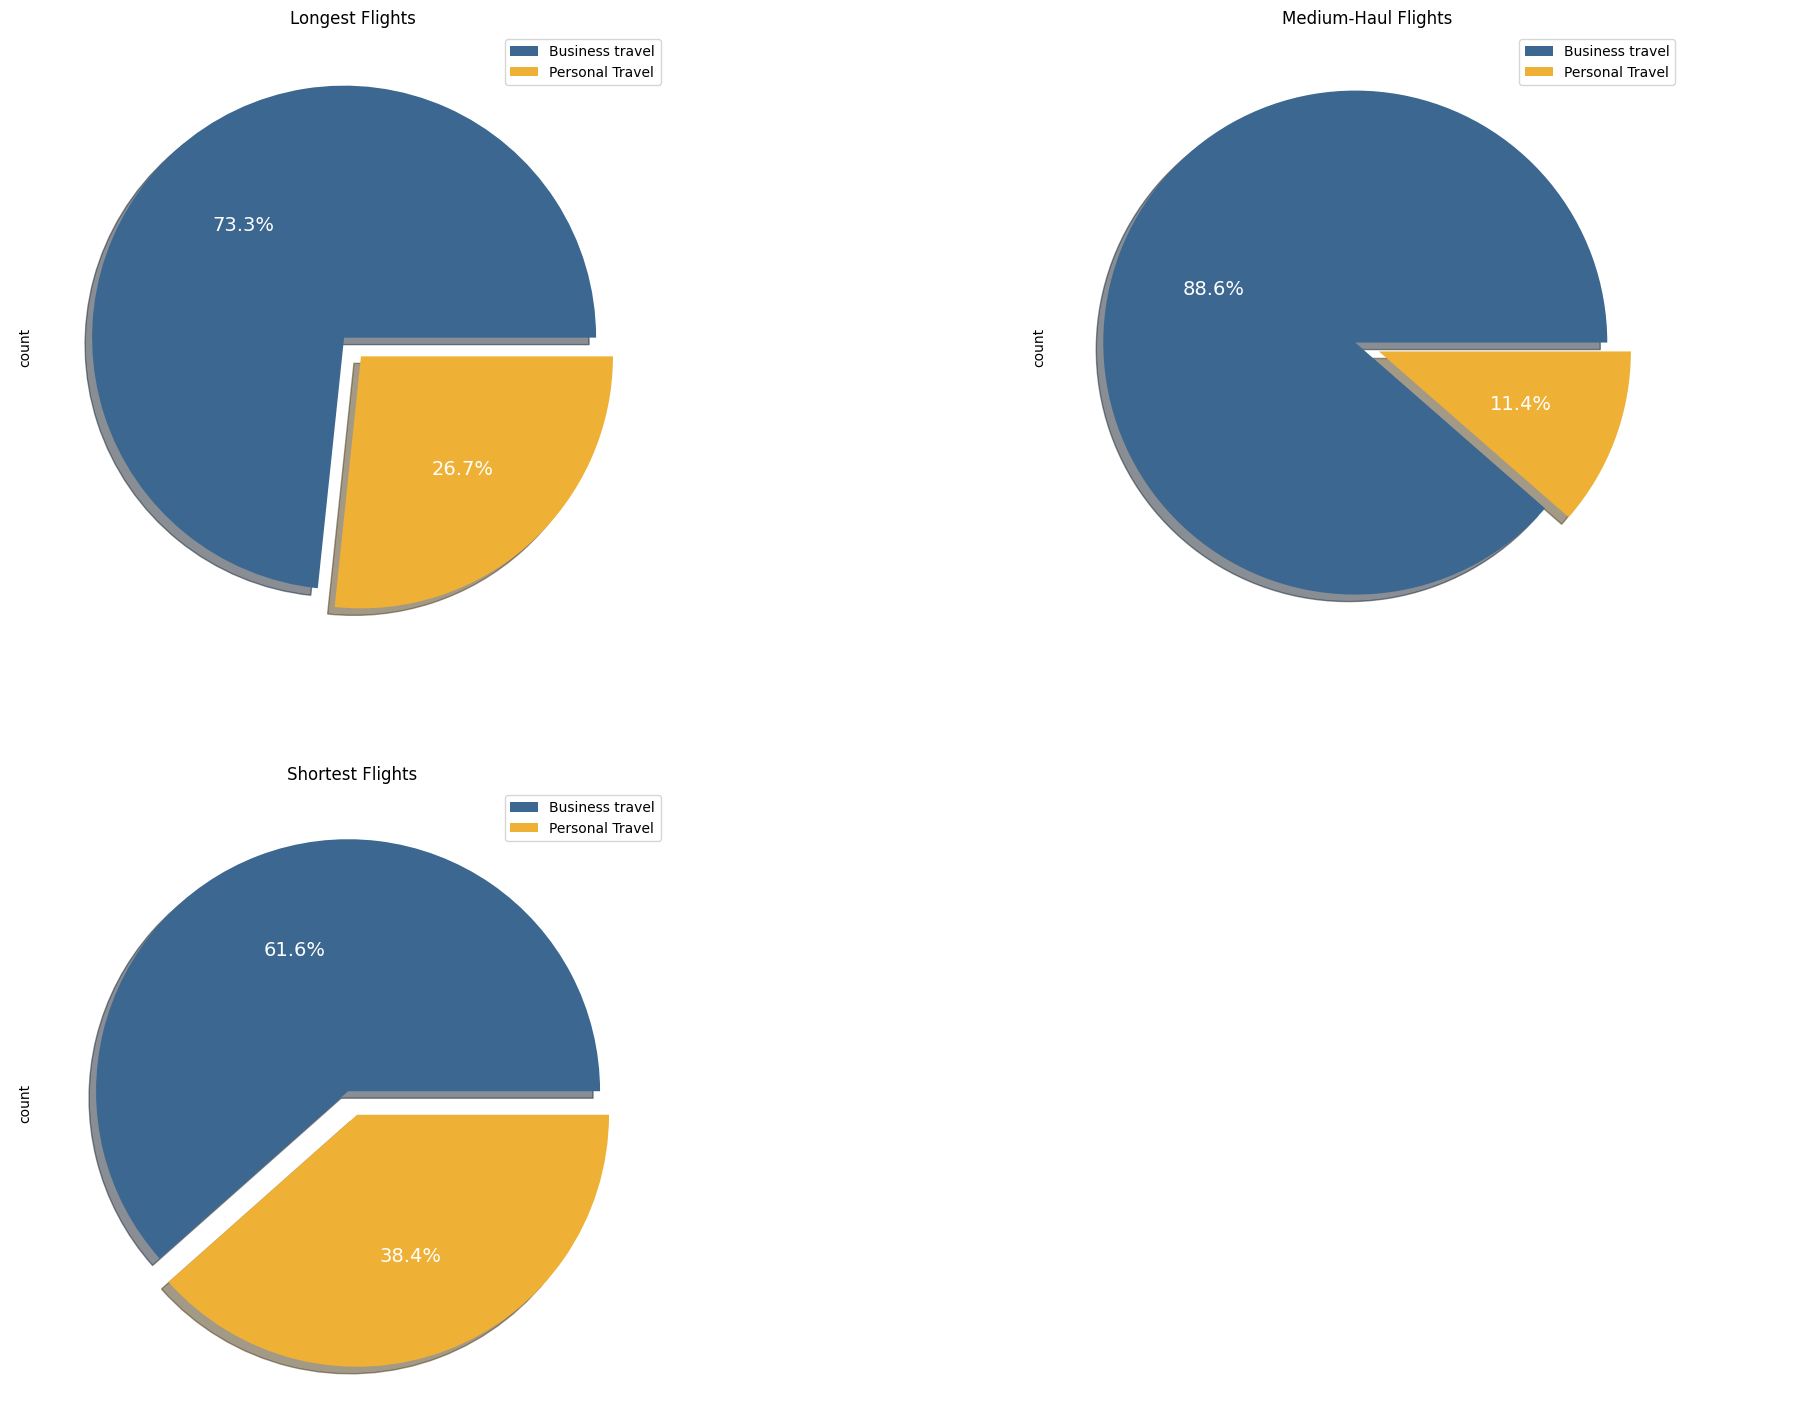

In [68]:
fig=plt.figure(figsize=(24,18))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
longest_flights['Type of Travel'].value_counts().plot(kind='pie',
                                                      autopct='%1.1f%%',
                                                      shadow=True,explode=[0.05,0.05],
                                                      ax=ax1,
                                                      legend=True,
                                                     colors=['#3B6790','#EFB036'],
                                                     textprops={'fontsize':14,'color':'w'})
ax1.set_title('Longest Flights')

medium_haul_flights['Type of Travel'].value_counts().plot(kind='pie',
                                                          ax=ax2,
                                                         shadow=True,
                                                         explode=[0.05,0.05],
                                                         legend=True,
                                                          autopct='%1.1f%%',
                                                         colors=['#3B6790','#EFB036'],
                                                         textprops={'fontsize':14,'color':'w'})
ax2.set_title('Medium-Haul Flights')

shortest_flights['Type of Travel'].value_counts().plot(kind='pie',
                                                       autopct='%1.1f%%',
                                                       shadow=True,
                                                       explode=[0.05,0.05],
                                                       ax=ax3,
                                                     colors=['#3B6790','#EFB036'],
                                                       textprops={'fontsize':14,'color':'w'},
                                                      legend=True)
ax3.set_title('Shortest Flights')


In [69]:
eda.Age.min(),eda.Age.max()

(7, 85)

#### <center>Feature Engineering</center>

In [70]:
bins=[7,13,18,25,61,86]
labels=['Children','Teenagers','Young Adults','Adults','Seniors']
eda['Age Category']=pd.cut(eda['Age'],bins=bins,labels=labels,right=False)
eda.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Category
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,Teenagers
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,Adults
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,Adults
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,Adults
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,Seniors


In [71]:
ordinal_var

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

#### Mean rating of 
  'Inflight wifi service',
  'Departure/Arrival time convenient',
  'Ease of Online booking', 
  'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness'

In [72]:
eda['Mean Rating']=round(eda[ordinal_var].mean(axis=1,),1)
eda.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Category,Mean Rating
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,Teenagers,3.9
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,Adults,2.3
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,Adults,3.7
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,Adults,3.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,Seniors,3.5


#### Flight Distance

In [73]:
bins=[30,1500,4000,5000]
labels=['Short-haul','Medium-haul','Long-haul']
eda['Distance Category']=pd.cut(eda['Flight Distance'],bins=bins,labels=labels,right=False)
eda.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Category,Mean Rating,Distance Category
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,4,5,5,25,18.0,neutral or dissatisfied,Teenagers,3.9,Short-haul
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,4,1,1,6.0,neutral or dissatisfied,Adults,2.3,Short-haul
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,4,4,5,0,0.0,satisfied,Adults,3.7,Short-haul
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,3,1,4,2,11,9.0,neutral or dissatisfied,Adults,3.0,Short-haul
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,3,3,3,0,0.0,satisfied,Seniors,3.5,Short-haul


###  <center>Machine Learning</center>

In [74]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [75]:
bins=[7,13,18,25,61,86]
labels=['Children','Teenagers','Young Adults','Adults','Seniors']
data['Age Category']=pd.cut(data['Age'],bins=bins,labels=labels,right=False)
test['Age Category']=pd.cut(test['Age'],bins=bins,labels=labels,right=False)


In [76]:
data['Mean Rating']=round(data[ordinal_var].mean(axis=1),1)
test['Mean Rating']=round(data[ordinal_var].mean(axis=1),1)

In [77]:
bins=[30,1500,4000,5000]
labels=['Short-haul','Medium-haul','Long-haul']
data['Distance Category']=pd.cut(data['Flight Distance'],bins=bins,labels=labels,right=False)
test['Distance Category']=pd.cut(test['Flight Distance'],bins=bins,labels=labels,right=False)

In [78]:
data=data.drop(['Unnamed: 0','id'],axis=1)
test=test.drop(['Unnamed: 0','id'],axis=1)


In [79]:
data['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [80]:
ohe_var=['Gender','Customer Type','Type of Travel','satisfaction']
ordinal_encoding_var=['Class']

In [81]:
ohe=OneHotEncoder(
    categories='auto',
    drop='first',
    sparse_output=False,
    handle_unknown='error'
)

In [82]:
ct=ColumnTransformer([
    ('ohe',ohe,ohe_var)
],remainder='passthrough',force_int_remainder_cols=False).set_output(transform='pandas')

In [83]:
ct.fit(data)

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Gender', 'Customer Type', 'Type of Travel',
                                  'satisfaction'])])

In [84]:
data_enc=ct.transform(data)
test_enc=ct.transform(test)

In [85]:
data_enc.head()

,ohe__Gender_Male,ohe__Customer Type_disloyal Customer,ohe__Type of Travel_Personal Travel,ohe__satisfaction_satisfied,remainder__Age,remainder__Class,remainder__Flight Distance,remainder__Inflight wifi service,remainder__Departure/Arrival time convenient,remainder__Ease of Online booking,...,remainder__Leg room service,remainder__Baggage handling,remainder__Checkin service,remainder__Inflight service,remainder__Cleanliness,remainder__Departure Delay in Minutes,remainder__Arrival Delay in Minutes,remainder__Age Category,remainder__Mean Rating,remainder__Distance Category
0,1.0,0.0,1.0,0.0,13,Eco Plus,460,3,4,3,...,3,4,4,5,5,25,18.0,Teenagers,3.9,Short-haul
1,1.0,1.0,0.0,0.0,25,Business,235,3,2,3,...,5,3,1,4,1,1,6.0,Adults,2.3,Short-haul
2,0.0,0.0,0.0,1.0,26,Business,1142,2,2,2,...,3,4,4,4,5,0,0.0,Adults,3.7,Short-haul
3,0.0,0.0,0.0,0.0,25,Business,562,2,5,5,...,5,3,1,4,2,11,9.0,Adults,3.0,Short-haul
4,1.0,0.0,0.0,1.0,61,Business,214,3,3,3,...,4,4,3,3,3,0,0.0,Seniors,3.5,Short-haul


In [86]:
test_enc.head()

,ohe__Gender_Male,ohe__Customer Type_disloyal Customer,ohe__Type of Travel_Personal Travel,ohe__satisfaction_satisfied,remainder__Age,remainder__Class,remainder__Flight Distance,remainder__Inflight wifi service,remainder__Departure/Arrival time convenient,remainder__Ease of Online booking,...,remainder__Leg room service,remainder__Baggage handling,remainder__Checkin service,remainder__Inflight service,remainder__Cleanliness,remainder__Departure Delay in Minutes,remainder__Arrival Delay in Minutes,remainder__Age Category,remainder__Mean Rating,remainder__Distance Category
0,0.0,0.0,0.0,1.0,52,Eco,160,5,4,3,...,5,5,2,5,5,50,44.0,Adults,3.9,Short-haul
1,0.0,0.0,0.0,1.0,36,Business,2863,1,1,3,...,4,4,3,4,5,0,0.0,Adults,2.3,Medium-haul
2,1.0,1.0,0.0,0.0,20,Eco,192,2,0,2,...,1,3,2,2,2,0,0.0,Young Adults,3.7,Short-haul
3,1.0,0.0,0.0,1.0,44,Business,3377,0,0,0,...,1,1,3,1,4,0,6.0,Adults,3.0,Medium-haul
4,0.0,0.0,0.0,1.0,49,Eco,1182,2,3,4,...,2,2,4,2,4,0,20.0,Adults,3.5,Short-haul


In [87]:
data_enc.columns

Index(['ohe__Gender_Male', 'ohe__Customer Type_disloyal Customer',
       'ohe__Type of Travel_Personal Travel', 'ohe__satisfaction_satisfied',
       'remainder__Age', 'remainder__Class', 'remainder__Flight Distance',
       'remainder__Inflight wifi service',
       'remainder__Departure/Arrival time convenient',
       'remainder__Ease of Online booking', 'remainder__Gate location',
       'remainder__Food and drink', 'remainder__Online boarding',
       'remainder__Seat comfort', 'remainder__Inflight entertainment',
       'remainder__On-board service', 'remainder__Leg room service',
       'remainder__Baggage handling', 'remainder__Checkin service',
       'remainder__Inflight service', 'remainder__Cleanliness',
       'remainder__Departure Delay in Minutes',
       'remainder__Arrival Delay in Minutes', 'remainder__Age Category',
       'remainder__Mean Rating', 'remainder__Distance Category'],
      dtype='object')

In [88]:
column_names=[var.replace('ohe__','').replace('remainder__','') for var in data_enc.columns]
column_names

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'satisfaction_satisfied',
 'Age',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Age Category',
 'Mean Rating',
 'Distance Category']

In [89]:
data_columns_name_dict=dict(zip(data_enc.columns,column_names))
data_columns_name_dict

{'ohe__Gender_Male': 'Gender_Male',
 'ohe__Customer Type_disloyal Customer': 'Customer Type_disloyal Customer',
 'ohe__Type of Travel_Personal Travel': 'Type of Travel_Personal Travel',
 'ohe__satisfaction_satisfied': 'satisfaction_satisfied',
 'remainder__Age': 'Age',
 'remainder__Class': 'Class',
 'remainder__Flight Distance': 'Flight Distance',
 'remainder__Inflight wifi service': 'Inflight wifi service',
 'remainder__Departure/Arrival time convenient': 'Departure/Arrival time convenient',
 'remainder__Ease of Online booking': 'Ease of Online booking',
 'remainder__Gate location': 'Gate location',
 'remainder__Food and drink': 'Food and drink',
 'remainder__Online boarding': 'Online boarding',
 'remainder__Seat comfort': 'Seat comfort',
 'remainder__Inflight entertainment': 'Inflight entertainment',
 'remainder__On-board service': 'On-board service',
 'remainder__Leg room service': 'Leg room service',
 'remainder__Baggage handling': 'Baggage handling',
 'remainder__Checkin service':

In [90]:
test_column_name_dict=dict(zip(test_enc.columns,column_names))
test_column_name_dict

{'ohe__Gender_Male': 'Gender_Male',
 'ohe__Customer Type_disloyal Customer': 'Customer Type_disloyal Customer',
 'ohe__Type of Travel_Personal Travel': 'Type of Travel_Personal Travel',
 'ohe__satisfaction_satisfied': 'satisfaction_satisfied',
 'remainder__Age': 'Age',
 'remainder__Class': 'Class',
 'remainder__Flight Distance': 'Flight Distance',
 'remainder__Inflight wifi service': 'Inflight wifi service',
 'remainder__Departure/Arrival time convenient': 'Departure/Arrival time convenient',
 'remainder__Ease of Online booking': 'Ease of Online booking',
 'remainder__Gate location': 'Gate location',
 'remainder__Food and drink': 'Food and drink',
 'remainder__Online boarding': 'Online boarding',
 'remainder__Seat comfort': 'Seat comfort',
 'remainder__Inflight entertainment': 'Inflight entertainment',
 'remainder__On-board service': 'On-board service',
 'remainder__Leg room service': 'Leg room service',
 'remainder__Baggage handling': 'Baggage handling',
 'remainder__Checkin service':

In [91]:
data_enc.rename(columns=data_columns_name_dict,errors='raise',inplace=True)
test_enc.rename(columns=test_column_name_dict,errors='raise',inplace=True)

In [92]:
data_enc.Class.unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [93]:
flight_class_mappings={
    'Eco':0,
    'Eco Plus':1,
    'Business':2
}
data_enc['Class']=data_enc['Class'].map(flight_class_mappings)
test_enc['Class']=test_enc['Class'].map(flight_class_mappings)

In [94]:
data_enc['Age Category'].unique()

['Teenagers', 'Adults', 'Seniors', 'Young Adults', 'Children']
Categories (5, object): ['Children' < 'Teenagers' < 'Young Adults' < 'Adults' < 'Seniors']

In [95]:
test_enc['Age Category'].unique()

['Adults', 'Young Adults', 'Teenagers', 'Seniors', 'Children']
Categories (5, object): ['Children' < 'Teenagers' < 'Young Adults' < 'Adults' < 'Seniors']

In [96]:
age_category_mappings={
    'Children':0,
    'Teenagers':1,
    'Young Adults':2,
    'Adults':3,
    'Seniors':4
}
data_enc['Age Category']=data_enc['Age Category'].map(age_category_mappings)
test_enc['Age Category']=test_enc['Age Category'].map(age_category_mappings)

In [97]:
distance_category_mappings={
    'Short-haul':0,
    'Medium-haul':1,
    'Long-haul':2
}
data_enc['Distance Category']=data_enc['Distance Category'].map(distance_category_mappings)
test_enc['Distance Category']=test_enc['Distance Category'].map(distance_category_mappings)

In [98]:
data_enc.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age Category,Mean Rating,Distance Category
0,1.0,0.0,1.0,0.0,13,1,460,3,4,3,...,3,4,4,5,5,25,18.0,1,3.9,0
1,1.0,1.0,0.0,0.0,25,2,235,3,2,3,...,5,3,1,4,1,1,6.0,3,2.3,0
2,0.0,0.0,0.0,1.0,26,2,1142,2,2,2,...,3,4,4,4,5,0,0.0,3,3.7,0
3,0.0,0.0,0.0,0.0,25,2,562,2,5,5,...,5,3,1,4,2,11,9.0,3,3.0,0
4,1.0,0.0,0.0,1.0,61,2,214,3,3,3,...,4,4,3,3,3,0,0.0,4,3.5,0


In [99]:
test_enc.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age Category,Mean Rating,Distance Category
0,0.0,0.0,0.0,1.0,52,0,160,5,4,3,...,5,5,2,5,5,50,44.0,3,3.9,0
1,0.0,0.0,0.0,1.0,36,2,2863,1,1,3,...,4,4,3,4,5,0,0.0,3,2.3,1
2,1.0,1.0,0.0,0.0,20,0,192,2,0,2,...,1,3,2,2,2,0,0.0,2,3.7,0
3,1.0,0.0,0.0,1.0,44,2,3377,0,0,0,...,1,1,3,1,4,0,6.0,3,3.0,1
4,0.0,0.0,0.0,1.0,49,0,1182,2,3,4,...,2,2,4,2,4,0,20.0,3,3.5,0


In [100]:
X_train,X_test,y_train,y_test=data_enc.drop('satisfaction_satisfied',axis=1),test_enc.drop('satisfaction_satisfied',axis=1),data_enc['satisfaction_satisfied'],test_enc['satisfaction_satisfied'] 

In [101]:
X_train.shape,X_test.shape

((103904, 25), (25976, 25))

In [102]:
numrical_var.append('Mean Rating')
numrical_var

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Mean Rating']

### Standardisation

In [103]:
scaler=StandardScaler().set_output(transform='pandas')
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [104]:
X_train_scaled.describe().round(2)

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age Category,Mean Rating,Distance Category
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,...,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,...,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.99,-0.47,-0.67,-2.14,-1.07,-1.16,-2.06,-2.01,-1.97,-2.33,...,-2.55,-2.23,-2.61,-3.10,-2.50,-0.39,-0.39,-3.49,-3.23,-0.66
25%,-0.99,-0.47,-0.67,-0.82,-1.07,-0.78,-0.55,-0.70,-0.54,-0.76,...,-1.03,-0.54,-0.24,-0.54,-0.98,-0.39,-0.39,0.29,-0.67,-0.66
50%,-0.99,-0.47,-0.67,0.04,-0.03,-0.35,0.20,-0.04,0.17,0.02,...,0.49,0.31,-0.24,0.31,-0.22,-0.39,-0.39,0.29,0.09,-0.66
75%,1.02,-0.47,1.49,0.77,1.01,0.56,0.96,0.62,0.89,0.80,...,0.49,1.16,0.55,1.16,0.54,-0.07,-0.06,0.29,0.69,1.51
max,1.02,2.12,1.49,3.02,1.01,3.80,1.71,1.27,1.60,1.58,...,1.25,1.16,1.34,1.16,1.31,41.25,40.56,1.54,2.66,3.68


In [105]:
X_test_scaled.describe().round(2)

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age Category,Mean Rating,Distance Category
count,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,...,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00
mean,0.00,0.01,-0.01,0.02,0.01,0.00,-0.00,-0.01,-0.00,0.00,...,-0.00,0.00,0.01,0.01,-0.00,-0.01,-0.01,0.02,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.01,1.01,1.01,1.00,...,1.00,1.00,1.00,1.00,1.01,0.98,0.97,0.99,1.00,1.00
min,-0.99,-0.47,-0.67,-2.14,-1.07,-1.16,-2.06,-2.01,-1.97,-1.55,...,-2.55,-2.23,-1.82,-3.10,-2.50,-0.39,-0.39,-3.49,-3.23,-0.66
25%,-0.99,-0.47,-0.67,-0.82,-1.07,-0.78,-0.55,-0.70,-0.54,-0.76,...,-1.03,-0.54,-0.24,-0.54,-0.98,-0.39,-0.39,0.29,-0.67,-0.66
50%,-0.99,-0.47,-0.67,0.04,-0.03,-0.34,0.20,-0.04,0.17,0.02,...,0.49,0.31,-0.24,0.31,-0.22,-0.39,-0.39,0.29,-0.06,-0.66
75%,1.02,-0.47,1.49,0.77,1.01,0.56,0.96,0.62,0.89,0.80,...,0.49,1.16,0.55,1.16,0.54,-0.07,-0.06,0.29,0.69,1.51
max,1.02,2.12,1.49,3.02,1.01,3.80,1.71,1.27,1.60,1.58,...,1.25,1.16,1.34,1.16,1.31,29.12,28.43,1.54,2.66,3.68


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>],
       [<Axes: title={'center': 'Mean Rating'}>, <Axes: >]], dtype=object)

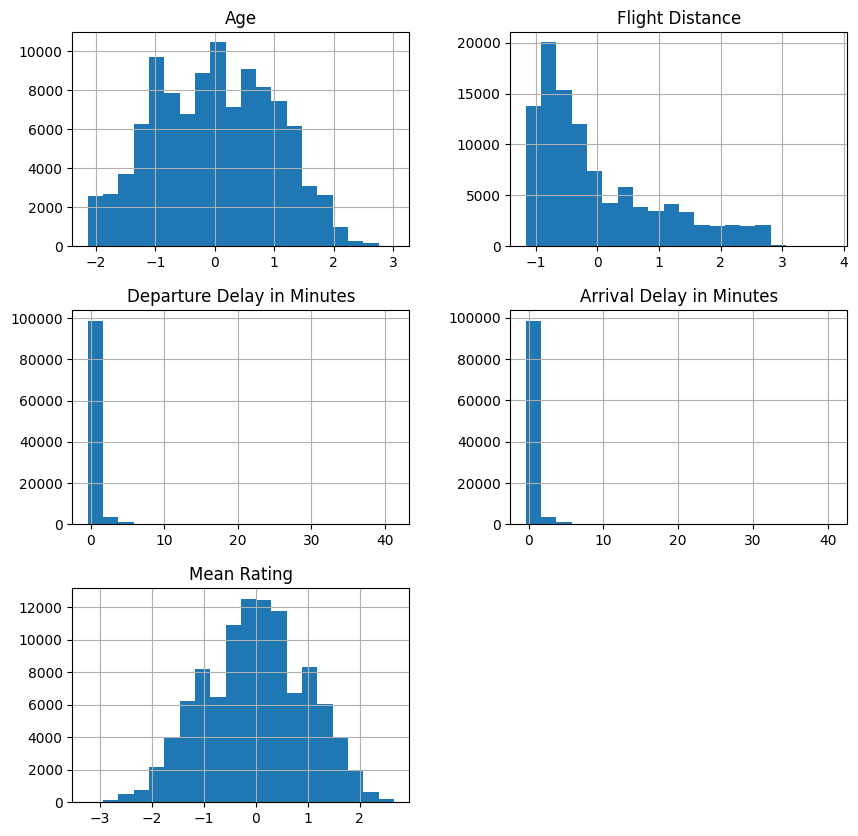

In [106]:
X_train_scaled[numrical_var].hist(bins=20,figsize=(10,10))

#### Logistic Regression

In [107]:
lr=LogisticRegression(random_state=0,solver='lbfgs',max_iter=3000)
model=lr.fit(X_train_scaled,y_train)


In [108]:
y_pred=model.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [109]:
cross_val_score(lr,X_test_scaled,y_test,scoring='accuracy')

array([0.87182448, 0.86968239, 0.86891242, 0.86756497, 0.87122233])

In [110]:
cross_val_score(lr,X_test_scaled,y_test,scoring='precision')

array([0.86423094, 0.86487716, 0.86697248, 0.85567471, 0.87343533])

In [111]:
cross_val_score(lr,X_test_scaled,y_test,scoring='f1')

array([0.85193419, 0.84885019, 0.84734364, 0.84772023, 0.84922245])

In [112]:
accuracy_score(y_test,y_pred)

0.4586541422851863

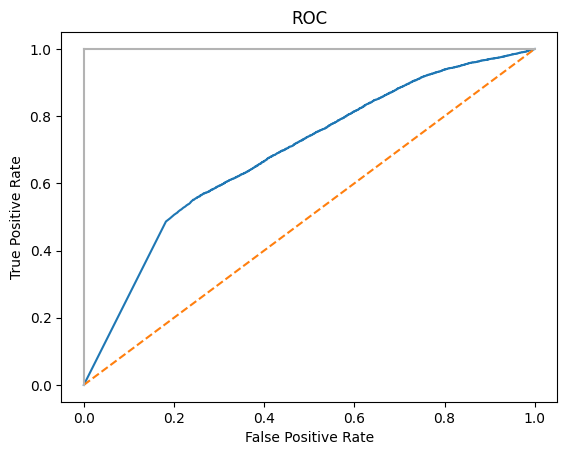

In [113]:
prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,prob)
plt.title('ROC')
plt.plot(fpr,tpr)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='0.7')
plt.plot([1,1],c='0.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [114]:
X_train.columns

Index(['Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Age', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Age Category', 'Mean Rating', 'Distance Category'],
      dtype='object')

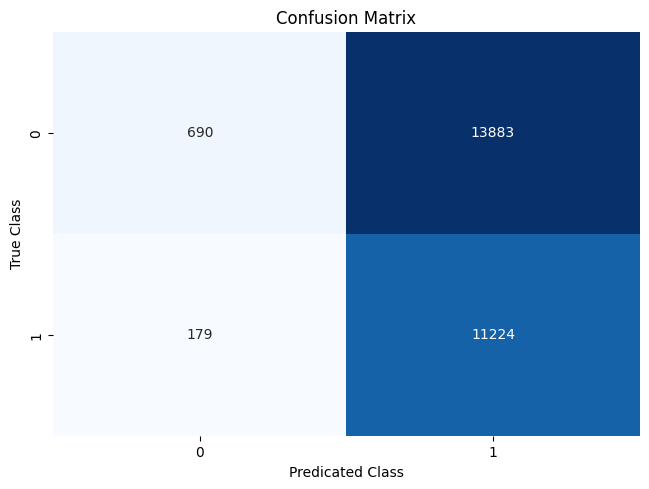

In [115]:
matrix=confusion_matrix(y_test,y_pred)
cm=pd.DataFrame(matrix)
sns.heatmap(cm,annot=True,cbar=None,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicated Class')
plt.show()

#### Logistic Regression - Regularization

In [116]:
lrr=LogisticRegressionCV(penalty='l2',Cs=10,random_state=0,n_jobs=-1)
model=lrr.fit(X_train_scaled,y_train)

In [117]:
y_pred=model.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.8691099476439791

In [118]:
y_prob=lrr.predict_proba(X_test)[:,1]

In [119]:
fpr,tpr,threshold=roc_curve(y_test,y_prob)

Text(0, 0.5, 'TPR')

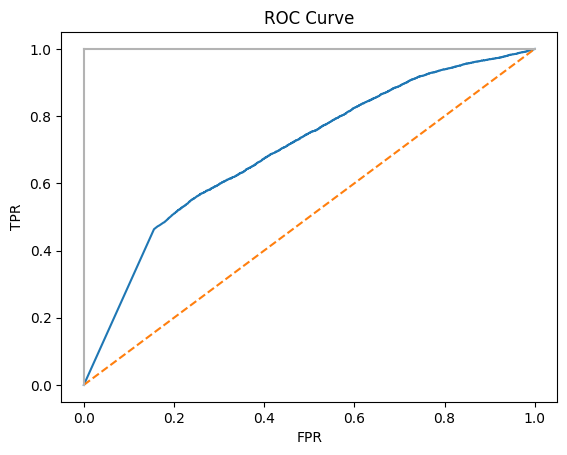

In [120]:
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='0.7')
plt.plot([1,1],c='0.7')
plt.xlabel('FPR')
plt.ylabel('TPR')

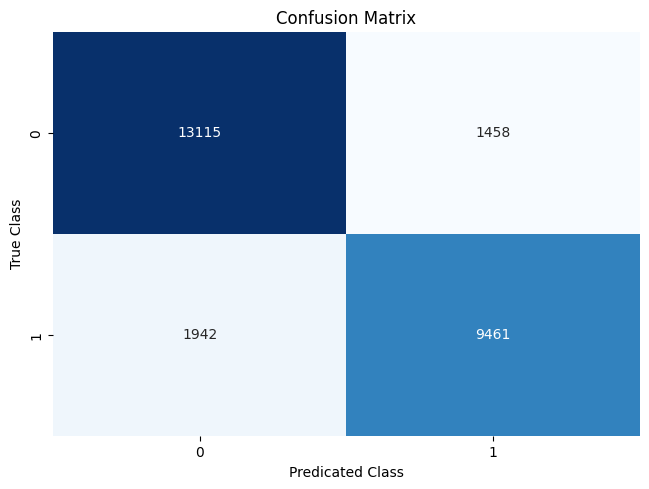

In [121]:
cmr=confusion_matrix(y_test,y_pred)
cmr_df=pd.DataFrame(cmr)
sns.heatmap(cmr_df,annot=True,cbar=None,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.xlabel('Predicated Class')
plt.ylabel('True Class')
plt.show()

In [122]:
X_train.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age Category,Mean Rating,Distance Category
0,1.0,0.0,1.0,13,1,460,3,4,3,1,...,3,4,4,5,5,25,18.0,1,3.9,0
1,1.0,1.0,0.0,25,2,235,3,2,3,3,...,5,3,1,4,1,1,6.0,3,2.3,0
2,0.0,0.0,0.0,26,2,1142,2,2,2,2,...,3,4,4,4,5,0,0.0,3,3.7,0
3,0.0,0.0,0.0,25,2,562,2,5,5,5,...,5,3,1,4,2,11,9.0,3,3.0,0
4,1.0,0.0,0.0,61,2,214,3,3,3,3,...,4,4,3,3,3,0,0.0,4,3.5,0


In [123]:
X_test.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age Category,Mean Rating,Distance Category
0,0.0,0.0,0.0,52,0,160,5,4,3,4,...,5,5,2,5,5,50,44.0,3,3.9,0
1,0.0,0.0,0.0,36,2,2863,1,1,3,1,...,4,4,3,4,5,0,0.0,3,2.3,1
2,1.0,1.0,0.0,20,0,192,2,0,2,4,...,1,3,2,2,2,0,0.0,2,3.7,0
3,1.0,0.0,0.0,44,2,3377,0,0,0,2,...,1,1,3,1,4,0,6.0,3,3.0,1
4,0.0,0.0,0.0,49,0,1182,2,3,4,3,...,2,2,4,2,4,0,20.0,3,3.5,0


### Tree And Forest

#### Tree

In [124]:
decisionTree=DecisionTreeClassifier(random_state=0)
dtm=decisionTree.fit(X_train,y_train)

In [125]:
y_hat=dtm.predict(X_test)
accuracy_score(y_test,y_hat)

0.9338235294117647

In [126]:
y_prob=dtm.predict_proba(X_test)
y_prob

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [127]:
decisionTree_entropy=DecisionTreeClassifier(criterion='entropy',random_state=0)
decisionTreeEntropyModel=decisionTree_entropy.fit(X_train,y_train)

In [128]:
y_hat=decisionTreeEntropyModel.predict(X_test)
accuracy_score(y_test,y_hat)

0.9325916230366492

In [129]:
y_prob_entropy=decisionTreeEntropyModel.predict_proba(X_test)
y_prob_entropy

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

#### Random Forest Classifier

In [130]:
randomForest=RandomForestClassifier(random_state=0,n_jobs=-1)
rfm=randomForest.fit(X_train,y_train)

In [131]:
y_hat_rf=rfm.predict(X_test)
accuracy_score(y_test,y_hat_rf)

0.9627733292269788

In [132]:
y_prob_rf=rfm.predict_proba(X_test)
y_prob_rf

array([[0.  , 1.  ],
       [0.01, 0.99],
       [0.94, 0.06],
       ...,
       [0.97, 0.03],
       [0.05, 0.95],
       [0.96, 0.04]])

In [133]:
adaboost=AdaBoostClassifier(random_state=0)
adaboostModel=adaboost.fit(X_train,y_train)

/home/orion/.local/share/pipx/venvs/notebook/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [134]:
adaboost_pred=adaboostModel.predict(X_test)
accuracy_score(adaboost_pred,y_test)

0.9253541730828457

#### Imporatant Featuers

In [135]:
importance=rfm.feature_importances_
indices=np.argsort(importance)[::-1]
names=[X_train.columns[i] for i in indices]

In [136]:
names

['Online boarding',
 'Inflight wifi service',
 'Class',
 'Type of Travel_Personal Travel',
 'Mean Rating',
 'Inflight entertainment',
 'Customer Type_disloyal Customer',
 'Seat comfort',
 'Ease of Online booking',
 'Flight Distance',
 'Leg room service',
 'On-board service',
 'Age',
 'Baggage handling',
 'Inflight service',
 'Checkin service',
 'Cleanliness',
 'Gate location',
 'Departure/Arrival time convenient',
 'Arrival Delay in Minutes',
 'Food and drink',
 'Departure Delay in Minutes',
 'Distance Category',
 'Age Category',
 'Gender_Male']

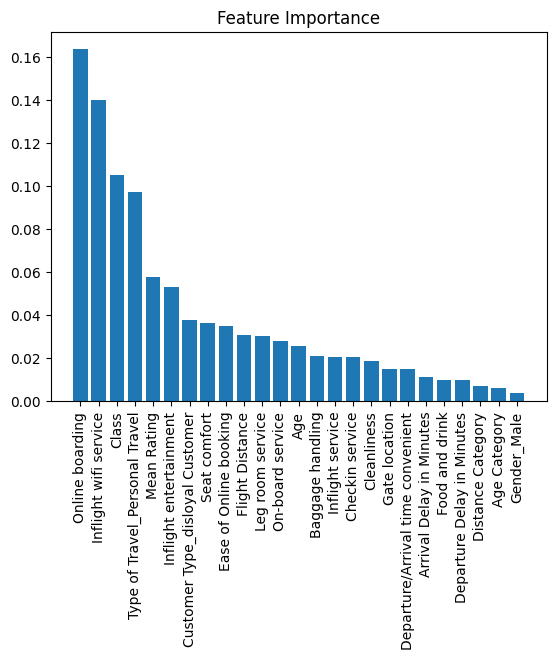

In [137]:
plt.figure()
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importance[indices])
plt.xticks(range(X_train.shape[1]),names,rotation=90)
plt.show()

#### Feature Selection

In [138]:
categorical_var

['Gender', 'Customer Type', 'Type of Travel']

In [139]:
ordinal_var

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

#### 1.Filter Statistical Tests

#### 1.1 Mutual Information

In [140]:
mi=mutual_info_classif(X=X_train,y=y_train,discrete_features=False,n_neighbors=2,random_state=0)

Text(0, 0.5, 'Mutual Information')

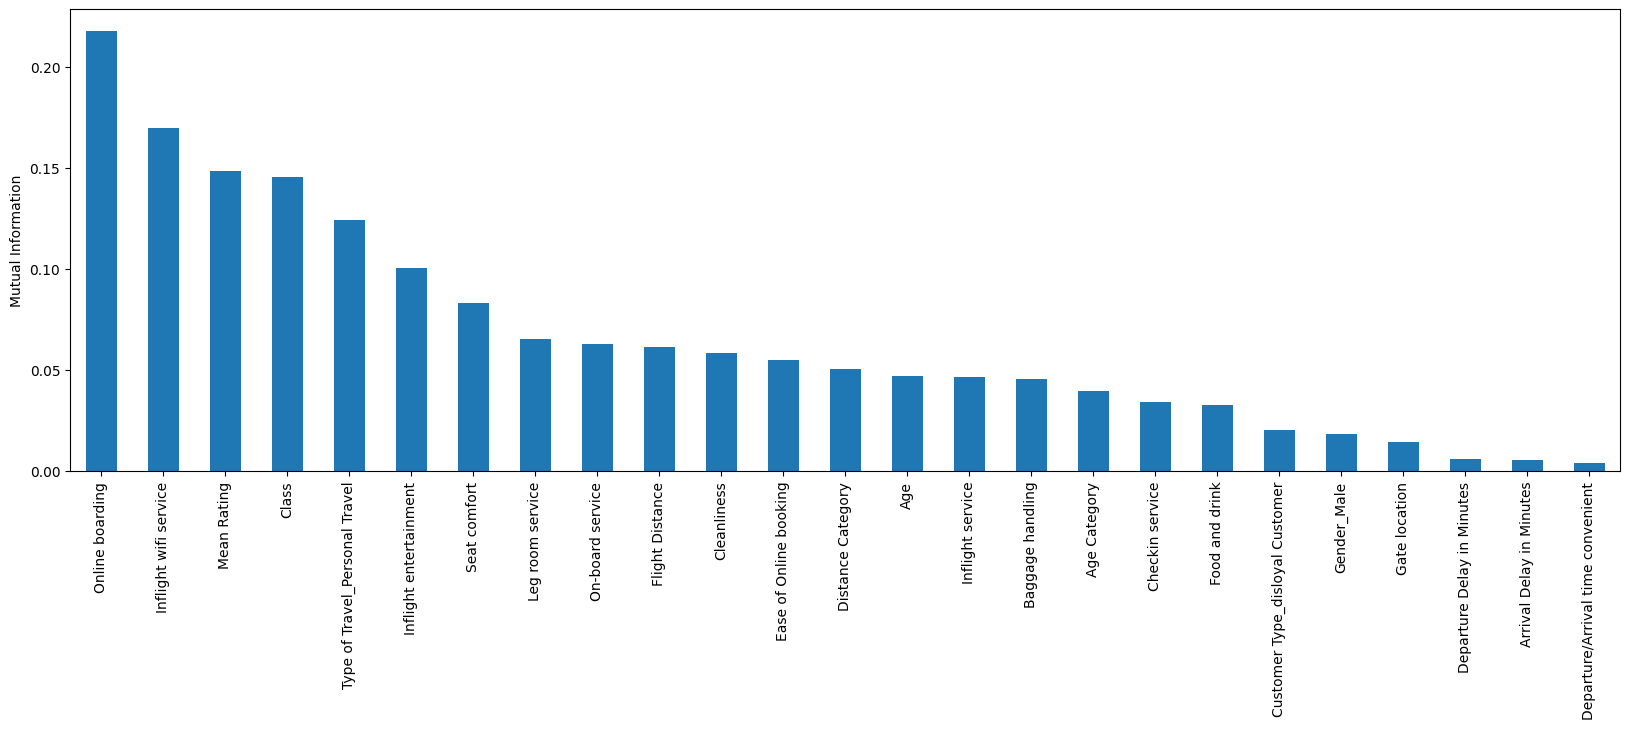

In [141]:
mi=pd.Series(mi)
mi.index=X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')


##### Select Top 15 Featuers

In [142]:
sel_ = SelectKBest(mutual_info_classif,k=15).fit(X_train,y_train)
X_train.columns[sel_.get_support()]

Index(['Type of Travel_Personal Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Ease of Online booking', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Inflight service',
       'Cleanliness', 'Mean Rating', 'Distance Category'],
      dtype='object')

In [143]:
X_train_mi=sel_.transform(X_train)
X_test_mi=sel_.transform(X_test)

In [144]:
X_train_mi.shape,X_test_mi.shape

((103904, 15), (25976, 15))

##### Select Top 10th Percentile Featuers

In [145]:
sel_=SelectPercentile(mutual_info_classif,percentile=10).fit(X_train,y_train)
X_train.columns[sel_.get_support()]

Index(['Inflight wifi service', 'Online boarding', 'Mean Rating'], dtype='object')

#### 1.2 Chi-Square Test
<b> What to do if we also have Continous Variables </b>

    - Discretise the continous variable,and then proceed as if it was categorical

In [146]:
X_train_chi=X_train.drop(numrical_var,axis=1)
X_test_chi=X_train.drop(numrical_var,axis=1)

In [147]:
X_train_chi.shape,X_test_chi.shape

((103904, 20), (103904, 20))

In [148]:
chi_ls=[]
for feature in X_train_chi.columns:
    c = pd.crosstab(y_train,X_train_chi[feature])
    p_value=chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Features importance based on chi-square test')

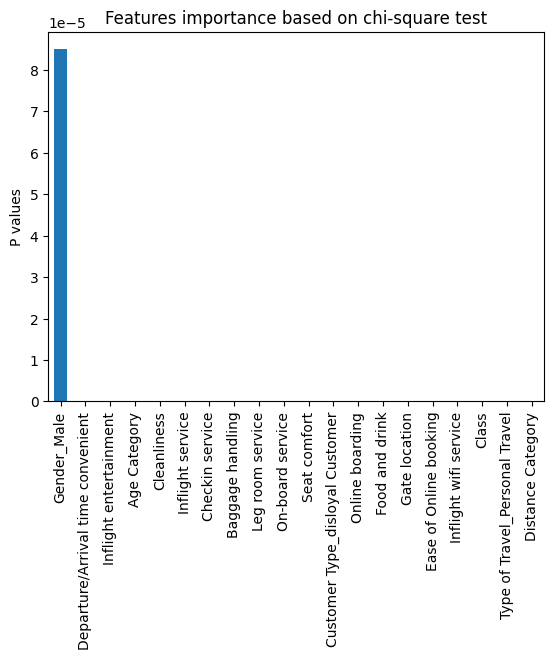

In [149]:
pd.Series(chi_ls,index=X_train_chi.columns).sort_values(ascending=False).plot.bar(rot=90)
plt.ylabel('P values')
plt.title('Features importance based on chi-square test')

In [150]:
selected_chi_square_features=pd.Series(chi_ls,index=X_train_chi.columns).sort_values(ascending=True)[0:15].index
selected_chi_square_features

Index(['Online boarding', 'Cleanliness', 'Inflight service', 'Checkin service',
       'Baggage handling', 'Leg room service', 'On-board service',
       'Inflight entertainment', 'Seat comfort', 'Distance Category',
       'Food and drink', 'Gate location', 'Ease of Online booking',
       'Inflight wifi service', 'Class'],
      dtype='object')

In [151]:
X_train_chi_features=X_train[selected_chi_square_features]
X_test_chi_features=X_test[selected_chi_square_features]

In [152]:
X_train_chi_features.shape,X_test_chi_features.shape

((103904, 15), (25976, 15))

#### 1.3 ANOVA 

In [153]:
X_train_anova=X_train[numrical_var]
X_test_anova=X_test[numrical_var]

In [154]:
univariate=f_classif(X_train_anova,y_train)
univariate

(array([ 1992.38911742, 10184.42191497,   265.59249283,   345.38610239,
        33803.55547497]),
 array([0.00000000e+00, 0.00000000e+00, 1.22934555e-59, 5.71477538e-77,
        0.00000000e+00]))

In [155]:
sel_= SelectKBest(f_classif,k=4).fit(X_train_anova,y_train)
X_train_anova.columns[sel_.get_support()]

Index(['Age', 'Flight Distance', 'Arrival Delay in Minutes', 'Mean Rating'], dtype='object')

In [156]:
X_train_anova=sel_.transform(X_train_anova)
X_test_anova=sel_.transform(X_test_anova)

#### 2. Wrapper Methods For Feature Selection

#### 2.1 Step-Forward Feature Selection

In [157]:
sfs=SFS(
    estimator=RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=0),
    n_features_to_select=15,
    tol=None,
    direction='forward',
    scoring='roc_auc',
    cv=2,
    n_jobs=-1
)
sfs= sfs.fit(X_train,y_train)

In [158]:
step_forward_feature_selection=sfs.get_feature_names_out()
step_forward_feature_selection

array(['Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Age', 'Class',
       'Inflight wifi service', 'Ease of Online booking', 'Gate location',
       'Online boarding', 'Seat comfort', 'On-board service',
       'Baggage handling', 'Inflight service', 'Age Category',
       'Mean Rating', 'Distance Category'], dtype=object)

In [159]:
def runRandomForest(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=100,random_state=0,max_depth=4)
    rf.fit(X_train,y_train)

    print('Train Set')
    y_pred=rf.predict_proba(X_train)
    print('Random Forest roc-auc : {}'.format(roc_auc_score(y_train,y_pred[:,1])))

    print('Test Set')
    y_pred=rf.predict_proba(X_test)
    print('Random Forest roc-aur: {}'.format(roc_auc_score(y_test,y_pred[:,1])))

In [160]:
runRandomForest(X_train[step_forward_feature_selection],X_test[step_forward_feature_selection],y_train,y_test)

Train Set
Random Forest roc-auc : 0.967026138426977
Test Set
Random Forest roc-aur: 0.9624216159743338


In [161]:
runRandomForest(X_train,X_test,y_train,y_test)

Train Set
Random Forest roc-auc : 0.9656000976753547
Test Set
Random Forest roc-aur: 0.9617238133041407


#### 3 . Embedded Methods For Feature Selection

In [162]:
sel_=SelectFromModel(
    LogisticRegression(C=100,penalty='l2',max_iter=300,random_state=0)
)
sel_.fit(X_train_scaled,y_train)

SelectFromModel(estimator=LogisticRegression(C=100, max_iter=300,
                                             random_state=0))

In [163]:
lr_selected_features=X_train_scaled.columns[sel_.get_support()]
lr_selected_features

Index(['Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class', 'Inflight wifi service', 'Online boarding', 'On-board service',
       'Leg room service', 'Checkin service', 'Arrival Delay in Minutes',
       'Mean Rating'],
      dtype='object')

In [164]:
def runLogistic(X_train,X_test,y_train,y_test):
    logit=LogisticRegression(C=0.005,random_state=0,max_iter=10000,penalty='l2')
    logit.fit(X_train,y_train)
    print('Train Set')
    y_pred=logit.predict_proba(X_train)
    print('ROC-AUC Score: {}'.format(roc_auc_score(y_train,y_pred[:,1])))
    print('Test Set')
    y_pred=logit.predict_proba(X_test)
    print('ROC-AUC Score: {}'.format(roc_auc_score(y_test,y_pred[:,1])))

In [165]:
runLogistic(X_train_scaled[lr_selected_features],X_test_scaled[lr_selected_features],y_train,y_test)

Train Set
ROC-AUC Score: 0.9229028750263848
Test Set
ROC-AUC Score: 0.9148851765940889


In [166]:
runLogistic(X_train_scaled,X_test_scaled,y_train,y_test)

Train Set
ROC-AUC Score: 0.926585094819716
Test Set
ROC-AUC Score: 0.923831863989872


In [167]:
sel_=RFE(RandomForestClassifier(n_estimators=10,random_state=0),n_features_to_select=15)
sel_.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=0),
    n_features_to_select=15)

In [168]:
rf_selected_features=X_train.columns[sel_.get_support()]
rf_selected_features

Index(['Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Age', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Ease of Online booking', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Mean Rating'],
      dtype='object')

In [169]:
runRandomForest(X_train[rf_selected_features],X_test[rf_selected_features],y_train,y_test)

Train Set
Random Forest roc-auc : 0.9664491029933787
Test Set
Random Forest roc-aur: 0.9608027111316894


In [170]:
runRandomForest(X_train,X_test,y_train,y_test)

Train Set
Random Forest roc-auc : 0.9656000976753547
Test Set
Random Forest roc-aur: 0.9617238133041407


#### Hyperparameter Tuning

#### 1.1 Cross Validation 

In [171]:
logit=LogisticRegression(penalty='l2',C=10,solver='liblinear',random_state=4,max_iter=10000)
kf=KFold(n_splits=5,random_state=0,shuffle=True)
clf=cross_validate(logit,X_train_scaled,y_train,scoring='accuracy',return_train_score=True,cv=kf)
clf['test_score']

array([0.87580001, 0.87604061, 0.87608873, 0.87387517, 0.87300289])

In [172]:
print('Mean Train set accuracy :',np.mean(clf['train_score']),'+-',np.std(clf['train_score']))
print('Mean Test set accuracy :',np.mean(clf['test_score']),'+/-',np.std(clf['test_score']))

Mean Train set accuracy : 0.8752117329269724 +- 0.0002951350535875606
Mean Test set accuracy : 0.8749614840757172 +/- 0.0012770677790909322


In [173]:
logit=LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=4,max_iter=10000)
rfk=RepeatedKFold(
    n_splits=5,
    n_repeats=5,
    random_state=0
)
print('We expect k*n performance metrics:',5*10)

clf=cross_validate(
    logit,
    X_train_scaled,
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=rfk
)

We expect k*n performance metrics: 50


In [174]:
print('Mean train set accuracy',np.mean(clf['train_score']),'+/-',np.std(clf['train_score']))
print('Mean test set accuracy',np.mean(clf['test_score']),'+/-',np.std(clf['test_score']))

Mean train set accuracy 0.8752045159239029 +/- 0.0005435719564876494
Mean test set accuracy 0.8750635253504639 +/- 0.0019179390665409694


In [175]:
logit=LogisticRegression(penalty='l2',solver='liblinear',random_state=0,max_iter=10000)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
clf=cross_validate(
    logit,
    X_train_scaled,
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=skf
)

In [176]:
print('Mean Train set accuracy',np.mean(clf['train_score']),'+/-',np.std(clf['train_score']))
print('Mean Test set accuracy',np.mean(clf['test_score']),'+/-',np.std(clf['test_score']))

Mean Train set accuracy 0.8751756413120308 +/- 0.0005791698097153587
Mean Test set accuracy 0.8749807333538694 +/- 0.0019645947923291164


#### Grid Search with Cross Validation

In [177]:
logit=LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=0,max_iter=10000)
params=dict(
    penalty=['l1','l2'],
    C=[0.1,1,10]
)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
clf=GridSearchCV(logit,params,scoring='accuracy',cv=kf,return_train_score=True,refit=True)
search=clf.fit(X_train,y_train)
search.best_params_

{'C': 1, 'penalty': 'l1'}

In [178]:
result=pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
result

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.875115,0.001318
1,"{'C': 0.1, 'penalty': 'l2'}",0.874981,0.001222
2,"{'C': 1, 'penalty': 'l1'}",0.875135,0.001427
3,"{'C': 1, 'penalty': 'l2'}",0.874961,0.001128
4,"{'C': 10, 'penalty': 'l1'}",0.875096,0.001388
5,"{'C': 10, 'penalty': 'l2'}",0.875010,0.001352


Text(0.5, 0, 'Hyperparameter Space')

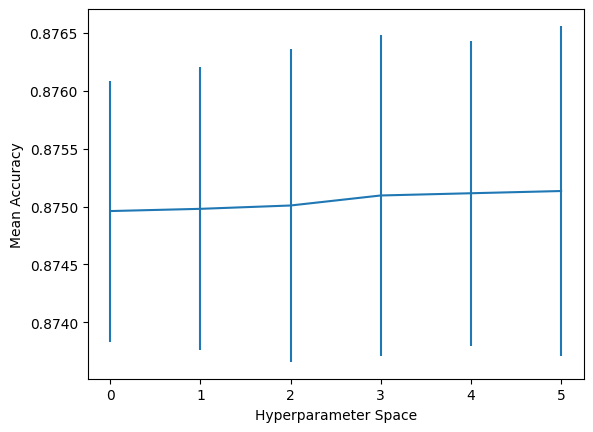

In [179]:
result.sort_values(by='mean_test_score',ascending=True,inplace=True)
result.reset_index(drop=True,inplace=True)
result['mean_test_score'].plot(yerr=[result['std_test_score'],result['std_test_score']],subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter Space')

In [180]:
train_pred=search.predict(X_train_scaled)
test_pred=search.predict(X_test_scaled)
print('Train Accuracy',accuracy_score(y_train,train_pred))
print('Test Accuracy',accuracy_score(y_test,test_pred))

Train Accuracy 0.566676932553126
Test Accuracy 0.5610178626424391


#### TensorFlow

In [181]:
model=models.Sequential()
model.add(keras.Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dense(units=214,activation='relu'))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=16,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))
model.compile(metrics=['accuracy'],loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.RMSprop())
history=model.fit(X_train_scaled,y_train,epochs=15,verbose=1,validation_data=(X_test_scaled,y_test))

Epoch 1/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.9231 - loss: 0.1940 - val_accuracy: 0.9475 - val_loss: 0.1343
Epoch 2/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.9538 - loss: 0.1121 - val_accuracy: 0.9391 - val_loss: 0.1675
Epoch 3/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.9585 - loss: 0.1038 - val_accuracy: 0.9284 - val_loss: 0.2384
Epoch 4/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.9587 - loss: 0.1036 - val_accuracy: 0.9195 - val_loss: 0.4523
Epoch 5/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.9588 - loss: 0.1060 - val_accuracy: 0.8851 - val_loss: 0.5900
Epoch 6/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.9612 - loss: 0.1029 - val_accuracy: 0.9033 - val_loss: 0.8162
Epoch 7/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.9614 - loss: 0.1046 - val_accuracy: 0.8941 - val_loss: 0.7983
Epoch 8/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.9586 -

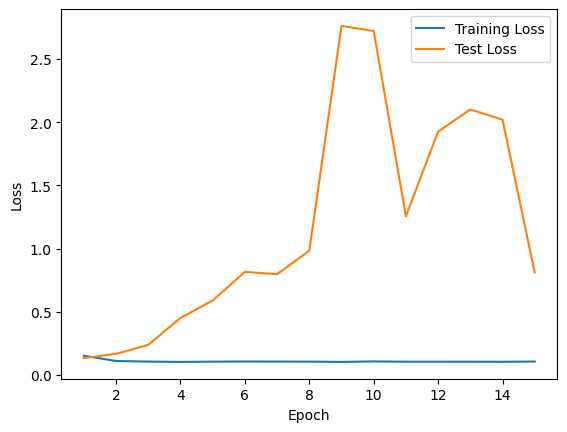

In [182]:
training_loss=history.history['loss']
test_loss=history.history['val_loss']
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count,training_loss)
plt.plot(epoch_count,test_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Test Loss'])

#### Regularization 

In [183]:
model=models.Sequential()
model.add(keras.Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(units=512,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=214,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=156,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=32,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=1,activation='sigmoid'))
model.compile(loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,epochs=15,verbose=1,validation_data=(X_test_scaled,y_test))

Epoch 1/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 67s 19ms/step - accuracy: 0.9088 - loss: 0.7885 - val_accuracy: 0.9234 - val_loss: 0.2908
Epoch 2/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 52s 16ms/step - accuracy: 0.9315 - loss: 0.2735 - val_accuracy: 0.9300 - val_loss: 0.2639
Epoch 3/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.9380 - loss: 0.2508 - val_accuracy: 0.9339 - val_loss: 0.2587
Epoch 4/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 56s 17ms/step - accuracy: 0.9403 - loss: 0.2408 - val_accuracy: 0.9329 - val_loss: 0.2525
Epoch 5/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 101s 31ms/step - accuracy: 0.9425 - loss: 0.2332 - val_accuracy: 0.9230 - val_loss: 0.2724
Epoch 6/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 92s 28ms/step - accuracy: 0.9413 - loss: 0.2317 - val_accuracy: 0.9348 - val_loss: 0.2455
Epoch 7/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 53s 16ms/step - accuracy: 0.9433 - loss: 0.2261 - val_accuracy: 0.9316 - val_loss: 0.2495
Epoch 8/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 72s 22ms/step - accuracy: 0.9429 

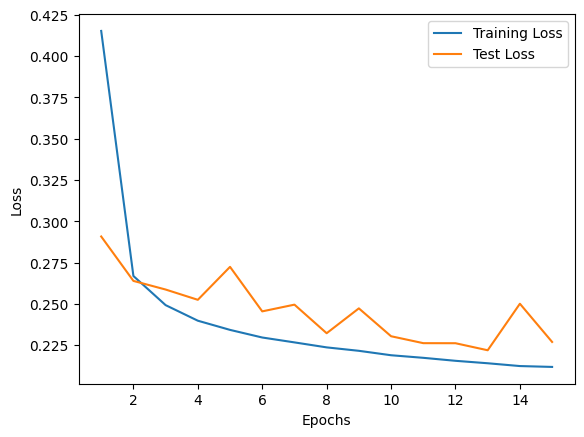

In [184]:
training_loss=history.history['loss']
test_loss=history.history['val_loss']
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count,training_loss)
plt.plot(epoch_count,test_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Test Loss'])
plt.show()

#### Early Stopping

In [185]:
model=models.Sequential()
model.add(keras.Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(units=516, activation='relu'))
model.add(layers.Dense(units=216,activation='relu'))
model.add(layers.Dense(units=124,activation='relu'))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=16,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))
model.compile(loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]
history=model.fit(X_train_scaled,y_train,epochs=15,verbose=1,validation_data=(X_test_scaled,y_test),callbacks=[callbacks])

Epoch 1/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - accuracy: 0.9208 - loss: 0.1982 - val_accuracy: 0.9453 - val_loss: 0.1389
Epoch 2/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - accuracy: 0.9534 - loss: 0.1143 - val_accuracy: 0.9291 - val_loss: 0.1988
Epoch 3/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 52s 16ms/step - accuracy: 0.9560 - loss: 0.1060 - val_accuracy: 0.9200 - val_loss: 0.2264
Epoch 4/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 65s 20ms/step - accuracy: 0.9592 - loss: 0.1010 - val_accuracy: 0.8821 - val_loss: 0.3701
Epoch 5/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 57s 18ms/step - accuracy: 0.9618 - loss: 0.0981 - val_accuracy: 0.9016 - val_loss: 0.7071
Epoch 6/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 63s 19ms/step - accuracy: 0.9620 - loss: 0.0979 - val_accuracy: 0.8874 - val_loss: 0.6261
Epoch 7/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 75s 23ms/step - accuracy: 0.9617 - loss: 0.0978 - val_accuracy: 0.8877 - val_loss: 0.9669
Epoch 8/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 71s 22ms/step - accuracy: 0.9618 -

#### Regularization,Early Stopping and Learning Rate Scheduler

In [186]:
def scheduler(epoch,lr):
    if epoch < 7 :
        return lr
    else :
        return lr * math.exp(-0.1)

model = models.Sequential()
model.add(keras.Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(units=516,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=214,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=124,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=32,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=1,activation='sigmoid'))
model.compile(loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
callback=[EarlyStopping(monitor='val_loss',patience=10),keras.callbacks.LearningRateScheduler(scheduler)]
history=model.fit(X_train_scaled,y_train,verbose=1,epochs=15,validation_data=(X_test_scaled,y_test),callbacks=[callback])

Epoch 1/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 77s 22ms/step - accuracy: 0.9066 - loss: 0.7762 - val_accuracy: 0.8951 - val_loss: 0.3594 - learning_rate: 0.0010
Epoch 2/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 60s 19ms/step - accuracy: 0.9314 - loss: 0.2738 - val_accuracy: 0.9346 - val_loss: 0.2619 - learning_rate: 0.0010
Epoch 3/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 58s 18ms/step - accuracy: 0.9373 - loss: 0.2537 - val_accuracy: 0.9209 - val_loss: 0.2819 - learning_rate: 0.0010
Epoch 4/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 76s 23ms/step - accuracy: 0.9379 - loss: 0.2463 - val_accuracy: 0.9360 - val_loss: 0.2560 - learning_rate: 0.0010
Epoch 5/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 79s 24ms/step - accuracy: 0.9404 - loss: 0.2375 - val_accuracy: 0.9343 - val_loss: 0.2485 - learning_rate: 0.0010
Epoch 6/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 110s 33ms/step - accuracy: 0.9396 - loss: 0.2345 - val_accuracy: 0.9341 - val_loss: 0.2471 - learning_rate: 0.0010
Epoch 7/15
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 115s 35ms/step - accu

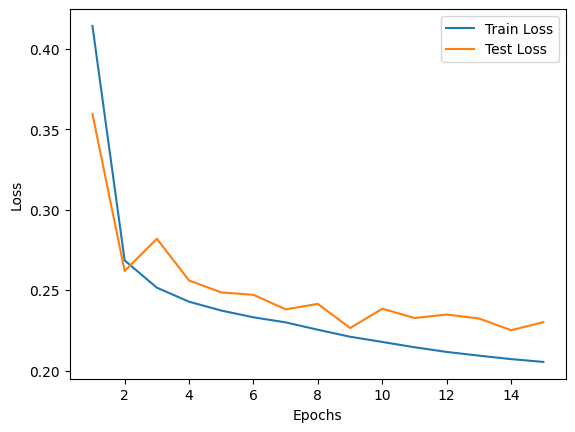

In [187]:
train_loss=history.history['loss']
test_loss=history.history['val_loss']
epoch_count=range(1,len(train_loss)+1)
plt.plot(epoch_count,train_loss)
plt.plot(epoch_count,test_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss','Test Loss'])
plt.show()

#### Hyperparameter Tuning